Суть проекта - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет 
на их успеваемость, чтобы определиться с параметрами будущей модели, которая 
предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

Задачи проекта:
    
1. Сформулировать гипотезы для дальнейшего построения модели.
проверить гипотезу о связи различных переменных с успеваемостью по математике 'scores'

2. Проверить качество данных и очистить их.
проверить данные на пустые значения
проверить данные на дублированные/полностью скоррелированные значения
проверить данные на наличие выбросов

3. Определиться с параметрами модели.
сделать выводы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('stud_math.csv')

In [3]:
display(df.head(10).T) # столбцов много, поэтому удобнее транспонировать вывод строк

,0,1,2,3,4,5,6,7,8,9
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M
age,18,17,15,15,16,16,16,17,15,15
address,U,U,U,U,U,U,NaN,U,U,U
famsize,NaN,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,NaN
Pstatus,A,NaN,T,T,T,T,T,A,A,NaN
Medu,4,1,1,4,3,4,2,4,3,3
Fedu,4,1,1,2,3,3,2,4,2,4
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other
Fjob,teacher,other,other,NaN,other,other,other,teacher,other,other


In [4]:
# смотрим на общую инфорацию о датасете: тип каждого признака,наличие пропусков.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

По типу признаков видно, что у нас 17 объектных и 13 числовых параметров, теперь смотрим описание датасета, чтобы понять, как интерпретировать значения строк.

Описание датасета:

school — аббревиатура школы, в которой учится ученик
sex — пол ученика ('F' - женский, 'M' - мужской)
age — возраст ученика (от 15 до 22)
address — тип адреса ученика ('U' - городской, 'R' - за городом)
famsize — размер семьи('LE3' <= 3, 'GT3' >3)
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
Medu — образование матери (0 - нет, 1 - 4 клаcса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 10 часов, 4 - >10 часов)
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
schoolsup — дополнительная образовательная поддержка (yes или no)
famsup — семейная образовательная поддержка (yes или no)
paid — дополнительные платные занятия по математике (yes или no)
activities — дополнительные внеучебные занятия (yes или no)
studytime, granular - ?
nursery — посещал детский сад (yes или no)
higher — хочет получить высшее образование (yes или no)
internet — наличие интернета дома (yes или no)
romantic — в романтических отношениях (yes или no)
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
absences — количество пропущенных занятий

таргетная величина:
score — баллы по госэкзамену по математике

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
# для удобства работы с данными переименуем столбцы:
df.rename(columns={'Pstatus': 'pstatus', 'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob', 'Medu': 'medu', 'studytime, granular': 'st_granular'}, inplace=True)

In [7]:
# Напишем функцию для вывода информации о переданном ей столбцу,а данные числовых
# столбцов визуализируем.


def col_summary(column):
    print('описание столбца:', column)
    print(f'пустые строки: {df[column].isnull().sum()}')
    print('распределение столбца:', pd.DataFrame(
        df[column].value_counts()))
    print(f'статистика: {df[column].describe()}')

    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        df[column].hist(bins = 10, label = 'IQR')
        plt.legend()
    print('\n')

описание столбца: score
пустые строки: 6
распределение столбца:        score
50.0      54
55.0      46
0.0       37
75.0      33
65.0      31
40.0      31
60.0      31
70.0      27
45.0      27
80.0      16
30.0      15
90.0      12
35.0       9
25.0       7
85.0       6
95.0       5
100.0      1
20.0       1
статистика: count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64




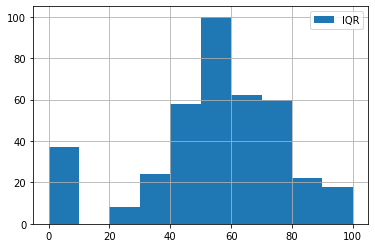

In [8]:
# сначала рассмотрим параметр 'score', с которым будем сопоставлять остальные признаки

col_summary('score')

In [9]:
# строки с пропусками нужно удалить, так как значения успеваемости важны для 
# построения модели.

df.score = df.score.apply(lambda x: x if x != 0 else None)
df.dropna(subset=['score'], inplace=True)

# просматриваем изменение данных
print("уникальных значений:", df.score.nunique())
df.loc[:, ['score']].info()

уникальных значений: 17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   352 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


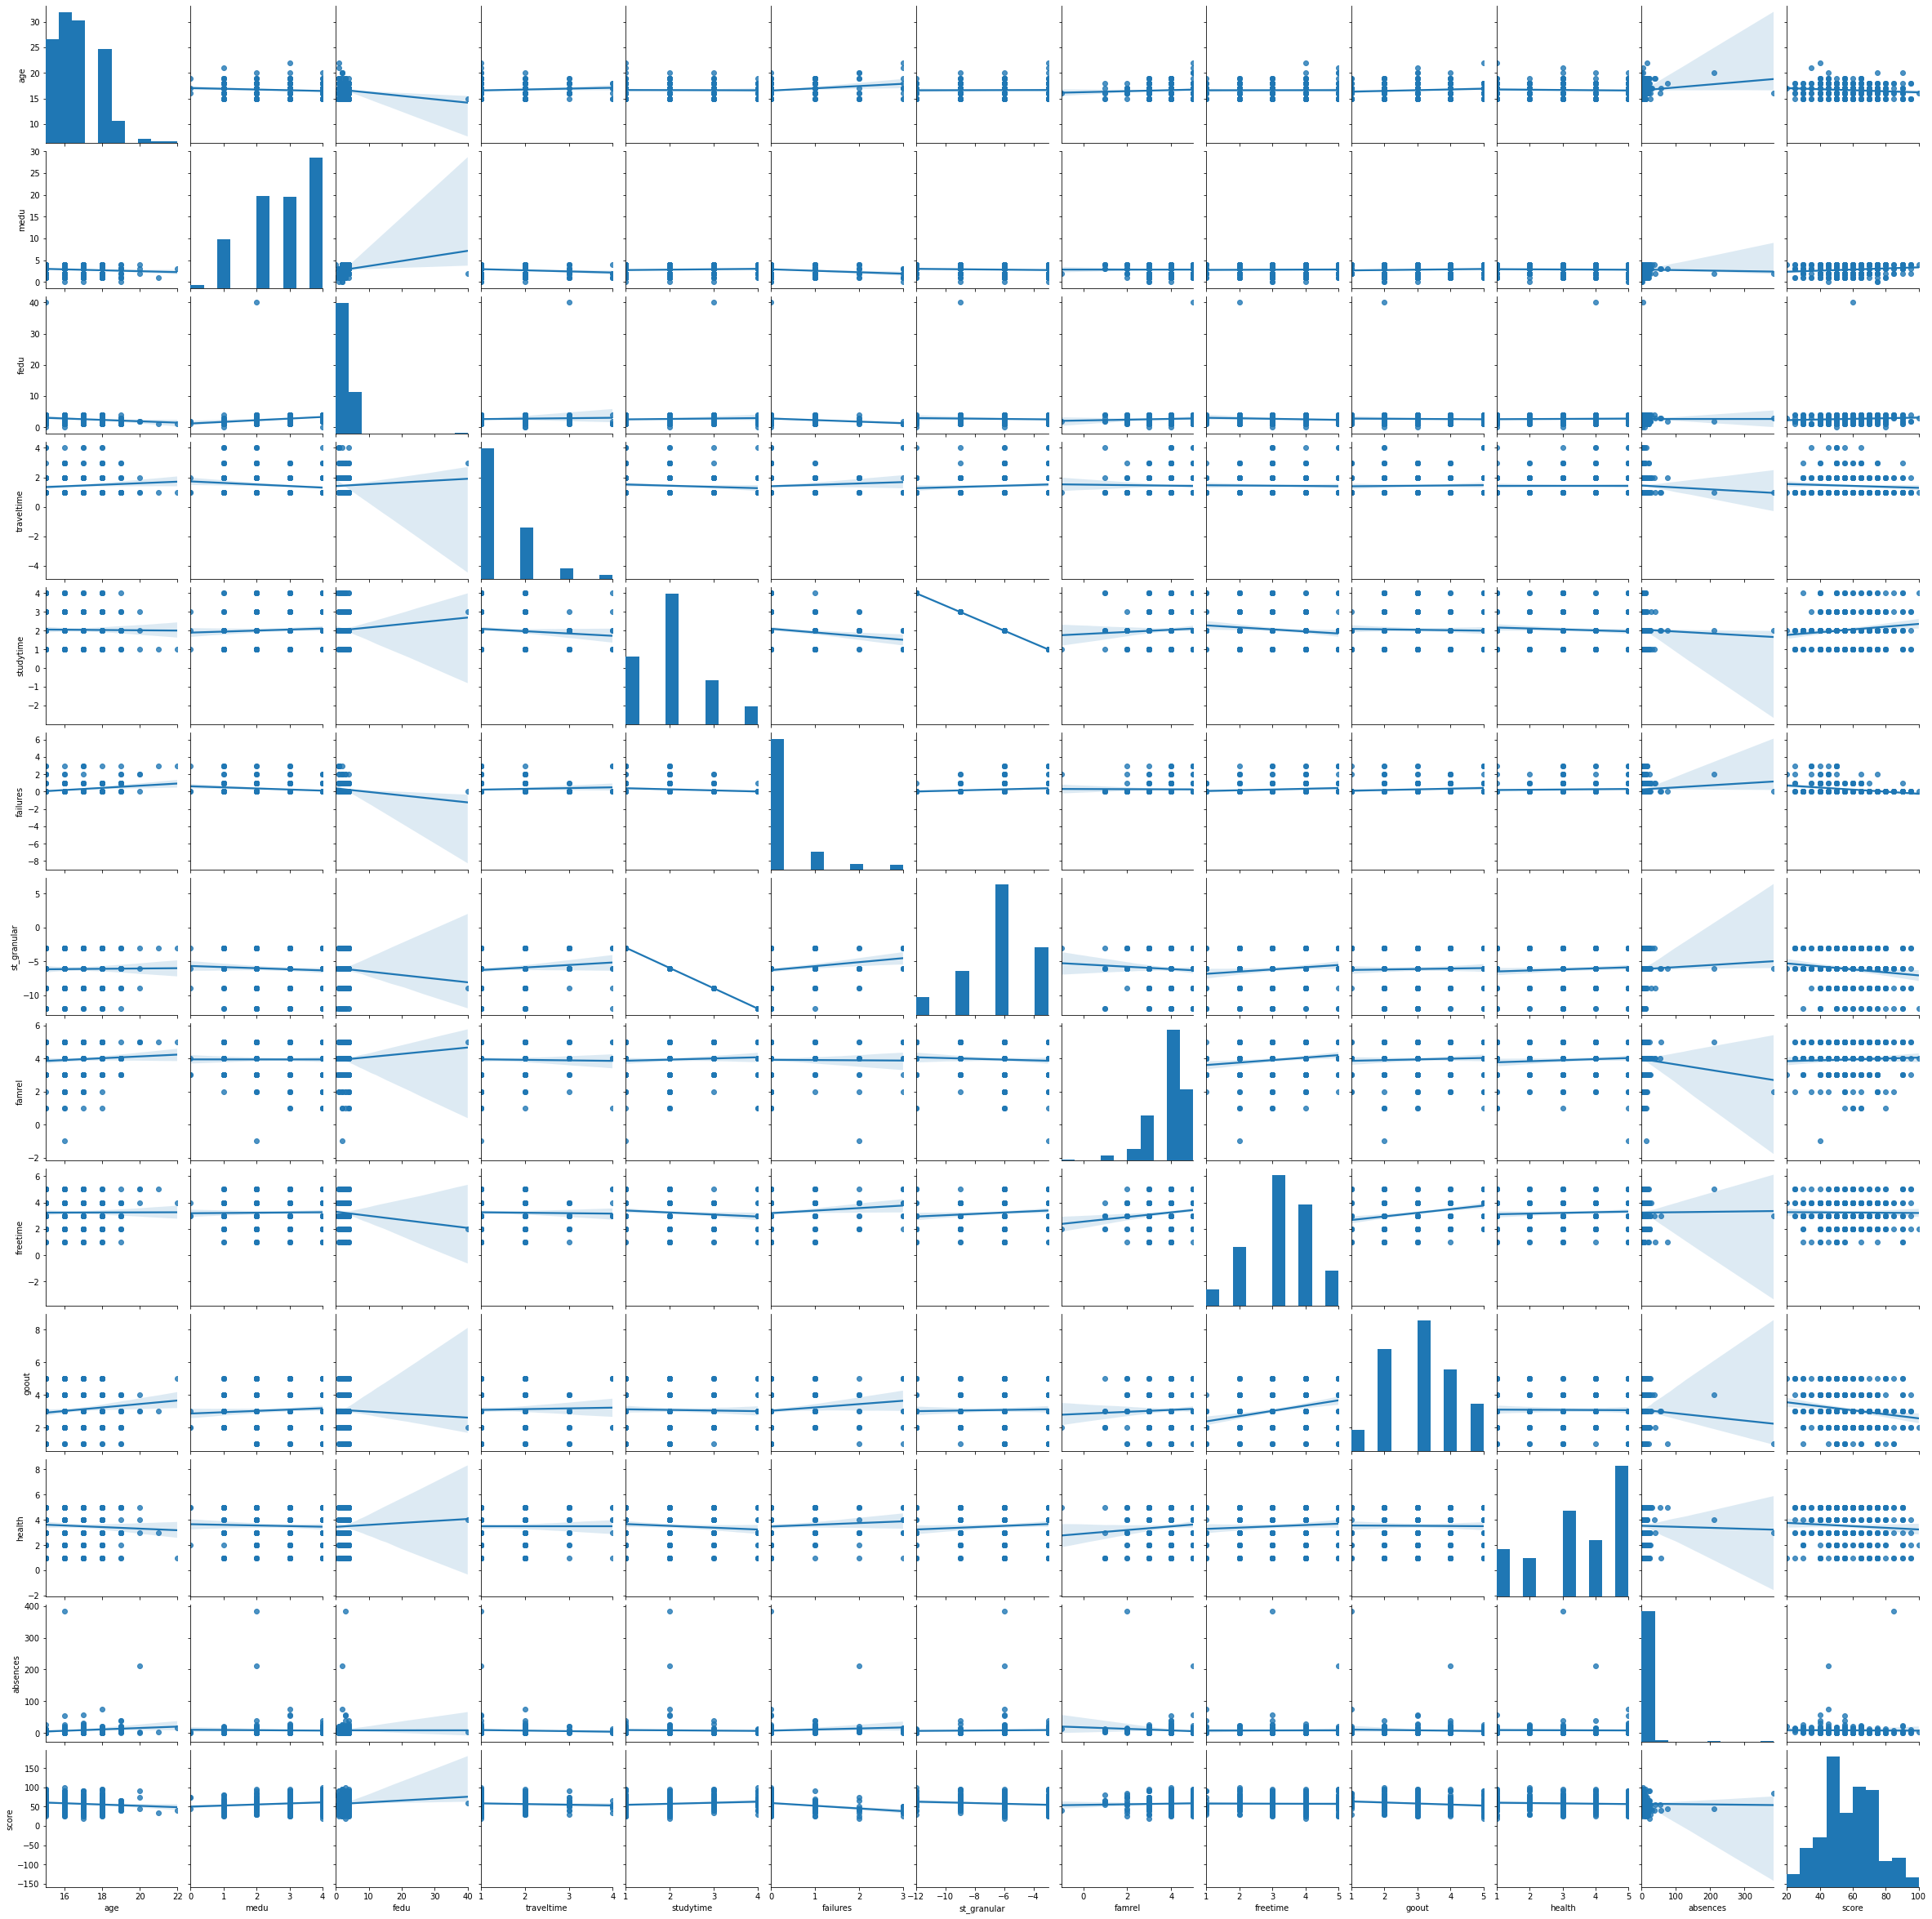

In [10]:
# рассмотрим распределение количественных признаков и связи с успеваемостью с помощью 
# графика типа pairplot
sns.pairplot(df, kind = 'reg')

Рассмотрев графики, возможно есть связь признаков 'age', 'medu', 'studytime', 'famrel', 'goout', 'health' с успеваемостью. 
Рассмотрим столбцы по отдельности.

описание столбца: age
пустые строки: 0
распределение столбца:     age
16   96
17   90
15   76
18   69
19   16
20    3
22    1
21    1
статистика: count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64




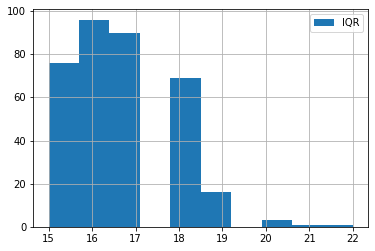

In [11]:
col_summary('age')

Несмотря на странный возраст > 20 для ученика(не студента), значения 21 и 22 не являются выбросами, т.к. они входят в заданный в описании интервал. Возможно эти ученики болели или уезжали.

описание столбца: medu
пустые строки: 2
распределение столбца:      medu
4.0   125
2.0    88
3.0    87
1.0    47
0.0     3
статистика: count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64




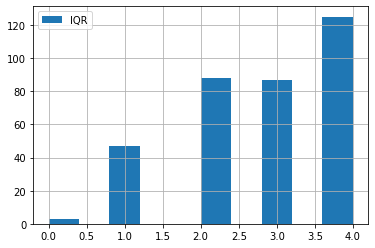

In [12]:
col_summary('medu')

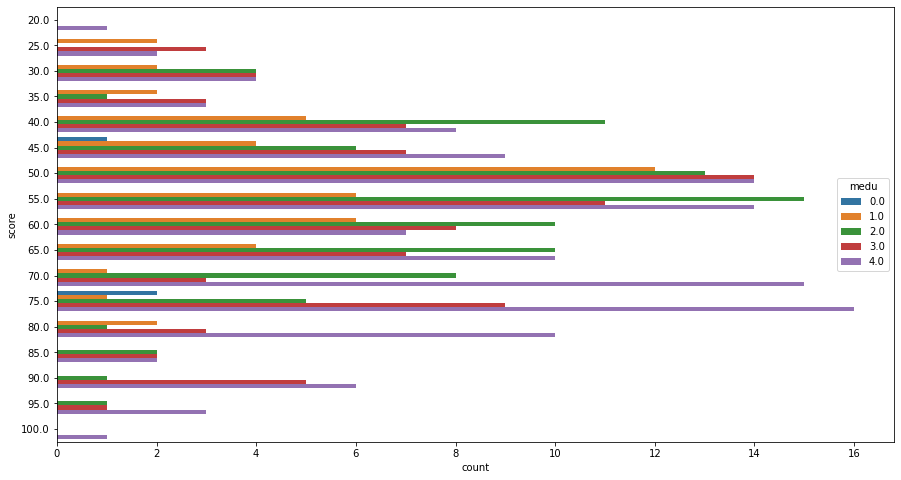

In [13]:
# попробуем посмотреть на распределение успеваемости в зависимости от образования 
# матери
plt.figure(figsize=(15,8))
sns.countplot(y='score', hue='medu',data=df)

На первый взгляд есть значимые различия,надо проверить через T-тест. Заменим пустые значения на None после корреляционного анализа.

описание столбца: fedu
пустые строки: 21
распределение столбца:       fedu
2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
статистика: count    331.000000
mean       2.658610
std        2.324066
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64




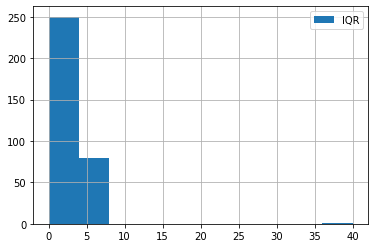

In [14]:
col_summary('fedu')

По условию 'fedu' может содержать только целые значения от 0 до 4, поэтому исправим ошибочное значение '40'.

In [15]:
df[df['fedu'] == 40] = 4

pd.DataFrame(df.fedu.value_counts())
print(df.fedu.nunique())

# просматриваем изменение данных
df.loc[:, ['fedu']].info()

5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    331 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


Как заполнять пропуски данных непонятно, далее рассмотрим параметры, которые могут на это влиять.

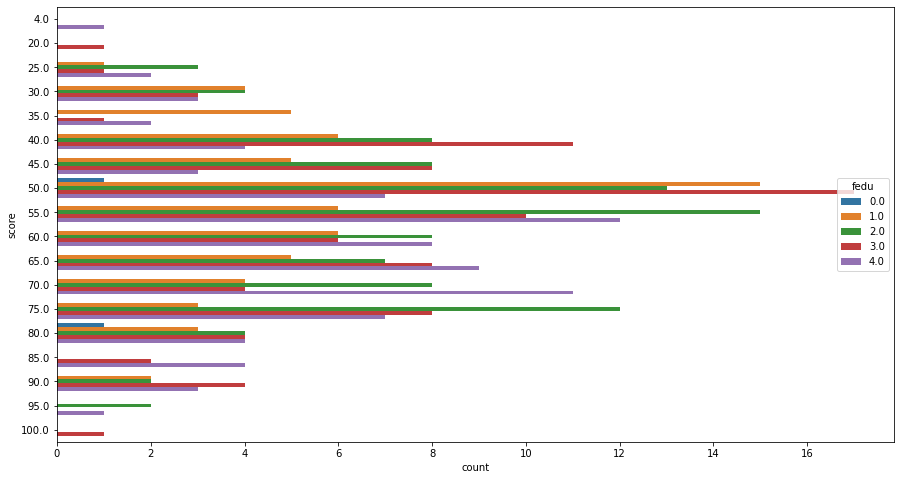

In [16]:
# попробуем посмотреть на распределение успеваемости в зависимости от образования отца
plt.figure(figsize=(15,8))
sns.countplot(y='score', hue='fedu',data=df)

Здесь в сравнении с параметром образования матери, связь не особо видна.

описание столбца: traveltime
пустые строки: 23
распределение столбца:      traveltime
1.0         219
2.0          86
3.0          16
4.0           8
статистика: count    329.000000
mean       1.431611
std        0.699981
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64




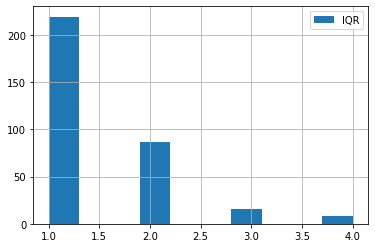

In [17]:
col_summary('traveltime')

Несмотря на то, что все значения соотвествуют условию заданного интервала (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.), есть много пропусков. Попробуем заполнить пропуски с учетом этой информации. Если у ученика с пропуском в 'traveltime' указана причина выбора школы 'home', то мы заменим пустое значение на 1, если указана другая причина, то заменим на None.

In [18]:
# запоминаем индексы пустых значений
missing_data = df[(df['traveltime'].isna())].index

# если в колонке 'reason' - 'home', заполним 'traveltime' 1.
df.loc[missing_data, 'traveltime'] = df.loc[missing_data, 'traveltime'].apply(lambda x: x == 1)

In [19]:
#Просматриваем изменение данных
df.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   traveltime  352 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB


описание столбца: studytime
пустые строки: 7
распределение столбца:      studytime
2.0        173
1.0         90
3.0         57
4.0         25
статистика: count    345.000000
mean       2.049275
std        0.845924
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64




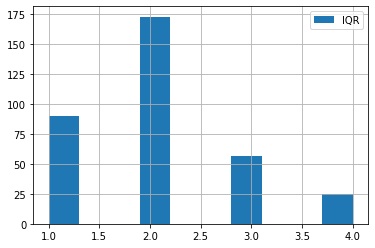

In [20]:
# все значения соотвествуют условию заданного интервала
col_summary('studytime')

Пропуски заполним после сравнения со столбцом st_granular , имеющим схожее название,
но не имеющим описания содержихся в нем данных.

описание столбца: failures
пустые строки: 20
распределение столбца:      failures
0.0       272
1.0        38
2.0        11
3.0        10
4.0         1
статистика: count    332.000000
mean       0.283133
std        0.698262
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: failures, dtype: float64




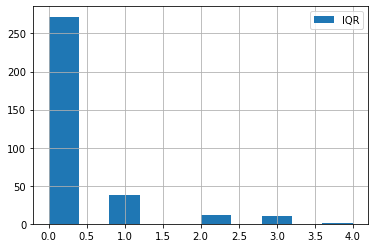

In [21]:
# все значения соотвествуют условию заданного интервала
col_summary('failures')

In [22]:
missing_data1 = df[(df['failures'].isna())].index # запоминаем индексы пустых значений

df.loc[missing_data1, ['failures']].fillna(df['failures'].mode())
# заменяем пустые значения на наиболее часто встречающееся по столбцу

,failures
21,NaN
48,NaN
54,NaN
68,NaN
91,NaN
107,NaN
108,NaN
114,NaN
115,NaN
125,NaN


описание столбца: st_granular
пустые строки: 7
распределение столбца:        st_granular
-6.0           173
-3.0            90
-9.0            57
-12.0           24
 4.0             1
статистика: count    345.000000
mean      -6.101449
std        2.576419
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max        4.000000
Name: st_granular, dtype: float64




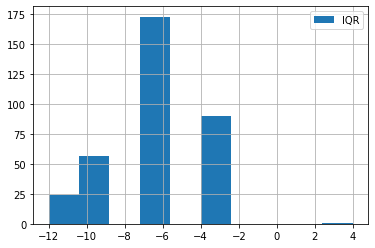

In [23]:
col_summary('st_granular')

Столбец странный: дублирует название другого столбца и схож по распределению, изначально неверное написание и нет информации о столбце в описании данных. Посмотрим на матрицу корреляции, чтобы определить, удалять ли этот столбец или нет.

In [24]:
df.corr()

,age,medu,fedu,studytime,failures,st_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.138424,-0.145182,-0.065616,0.053910,-0.094795,0.067235,-0.019444,0.084615,-0.057233,0.102934,-0.031465
medu,-0.138424,1.000000,0.613085,0.079788,-0.179968,-0.058986,0.001900,0.020762,0.080985,-0.036143,-0.028248,0.173538
fedu,-0.145182,0.613085,1.000000,-0.005839,-0.232343,0.031329,-0.017273,-0.022301,0.051769,0.018671,0.017545,0.119080
studytime,-0.065616,0.079788,-0.005839,1.000000,-0.108937,-0.943370,0.060043,-0.118583,-0.020501,-0.083732,-0.030586,0.116659
failures,0.053910,-0.179968,-0.232343,-0.108937,1.000000,0.209717,-0.007865,0.132757,0.133699,0.067416,0.082721,-0.324365
st_granular,-0.094795,-0.058986,0.031329,-0.943370,0.209717,1.000000,-0.057715,0.130945,0.035495,0.088794,0.027069,-0.173651
famrel,0.067235,0.001900,-0.017273,0.060043,-0.007865,-0.057715,1.000000,0.167435,0.054580,0.095391,-0.089246,0.044896
freetime,-0.019444,0.020762,-0.022301,-0.118583,0.132757,0.130945,0.167435,1.000000,0.295069,0.074921,0.006825,-0.018930
goout,0.084615,0.080985,0.051769,-0.020501,0.133699,0.035495,0.054580,0.295069,1.000000,-0.008496,-0.051545,-0.187039
health,-0.057233,-0.036143,0.018671,-0.083732,0.067416,0.088794,0.095391,0.074921,-0.008496,1.000000,-0.014308,-0.077578


Вывод: колонки 'studytime' и 'st_granular' полностью коррелируют, поэтому дублирующую 'st_granular' удалим. Остальные колонки слабо коррелируют между собой, все параметры могут оказывать влияние на успеваемость по математике.

In [25]:
df.drop(columns='st_granular', inplace=True)

описание столбца: famrel
пустые строки: 24
распределение столбца:       famrel
 4.0     164
 5.0      87
 3.0      56
 2.0      14
 1.0       6
-1.0       1
статистика: count    328.000000
mean       3.939024
std        0.920013
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64




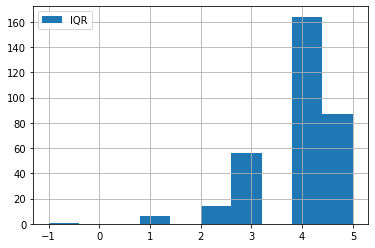

In [26]:
col_summary('famrel')

In [27]:
# исправим ошибочное значение, так как 'famrel' может содержать только целые значения
# от 1 до 5
df = df[df.famrel != -1.0]

описание столбца: freetime
пустые строки: 8
распределение столбца:      freetime
3.0       132
4.0       103
2.0        57
5.0        35
1.0        16
статистика: count    343.000000
mean       3.244898
std        1.002086
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64




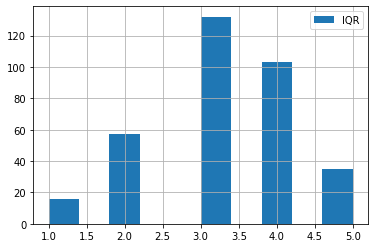

In [28]:
# все значения соотвествуют условию заданного интервала
col_summary('freetime')

описание столбца: goout
пустые строки: 6
распределение столбца:      goout
3.0    118
2.0     90
4.0     75
5.0     43
1.0     19
статистика: count    345.000000
mean       3.095652
std        1.091515
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64




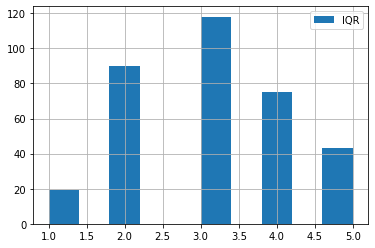

In [29]:
# все значения соотвествуют условию заданного интервала
col_summary('goout')

описание столбца: health
пустые строки: 13
распределение столбца:      health
5.0     123
3.0      81
4.0      53
1.0      45
2.0      36
статистика: count    338.000000
mean       3.511834
std        1.412589
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64




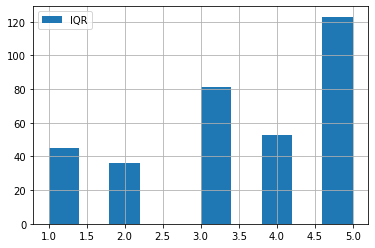

In [30]:
# все значения соотвествуют условию заданного интервала
col_summary('health')

описание столбца: absences
пустые строки: 10
распределение столбца:        absences
0.0          74
2.0          60
4.0          52
6.0          30
8.0          20
10.0         17
12.0         12
14.0         11
3.0           7
16.0          7
7.0           6
18.0          5
5.0           5
20.0          4
22.0          3
9.0           3
1.0           3
15.0          2
13.0          2
11.0          2
25.0          1
54.0          1
385.0         1
26.0          1
56.0          1
24.0          1
212.0         1
21.0          1
75.0          1
30.0          1
19.0          1
38.0          1
40.0          1
23.0          1
17.0          1
28.0          1
статистика: count    341.000000
mean       8.073314
std       24.738822
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64




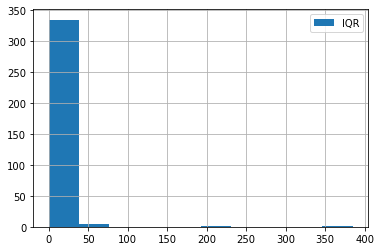

In [31]:
col_summary('absences')

Видим, что основное распределение лежит между 0-40 и есть потенциальные/явные выбросы свыше 60 пропусков.

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


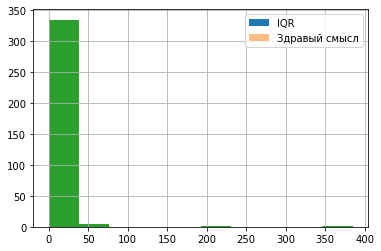

In [32]:
median = df.absences.median()
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print(
	'25-й перцентиль: {},'.format(perc25), 
	'75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
	"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df.absences.loc[df.absences.between(
	perc25 - 1.5*IQR, 
	perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
df.absences.loc[df.absences <= 100].hist(
	alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
plt.legend();

df['absences'].hist()

<ipython-input-33-b129ed81fc17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['absences'] = df['absences'].apply(lambda x: x if x <= 60 else None)


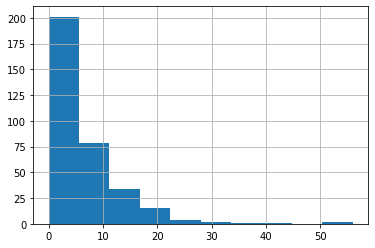

In [33]:
# отбрасываем два явных выброса >60
df['absences'] = df['absences'].apply(lambda x: x if x <= 60 else None)
df['absences'].hist()

In [35]:
# заменим пустые значения на None в 'medu'

df.medu = df.medu.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())

#Просматриваем изменение данных
df.loc[:, ['medu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   medu    351 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [36]:
for column in df.columns:
    if df[column].dtypes == object:
        print(col_summary(column))

описание столбца: school
пустые строки: 0
распределение столбца:     school
GP     309
MS      41
4        1
статистика: count     351
unique      3
top        GP
freq      309
Name: school, dtype: object


None
описание столбца: sex
пустые строки: 0
распределение столбца:    sex
F  180
M  170
4    1
статистика: count     351
unique      3
top         F
freq      180
Name: sex, dtype: object


None
описание столбца: address
пустые строки: 14
распределение столбца:    address
U      263
R       73
4        1
статистика: count     337
unique      3
top         U
freq      263
Name: address, dtype: object


None
описание столбца: famsize
пустые строки: 24
распределение столбца:      famsize
GT3      226
LE3      100
4          1
статистика: count     327
unique      3
top       GT3
freq      226
Name: famsize, dtype: object


None
описание столбца: pstatus
пустые строки: 39
распределение столбца:    pstatus
T      277
A       34
4        1
статистика: count     312
unique      3
top      

In [39]:
# заполняем пустые значения в столбце 'address'

df.address = df.address.astype(str).apply(lambda x : None if pd.isnull(x)
   else None if str.lower(x) == 'nan'
   else None if x.strip == ''
   else x.strip())

# просматриваем изменение данных
df.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  351 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [40]:
# посмотрим, различаются ли распределения 'score' в зависимости от значения 
# категориальных переменных с помощью box-plot

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:29])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

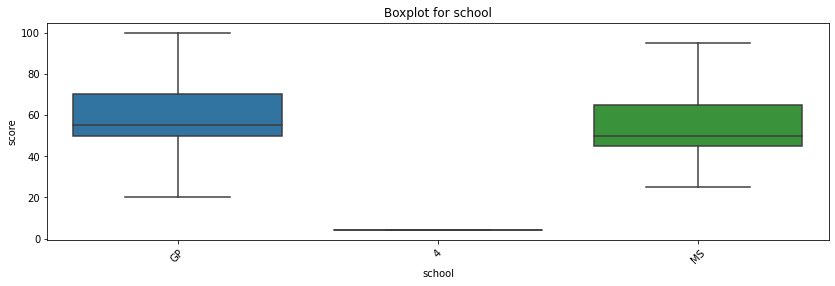

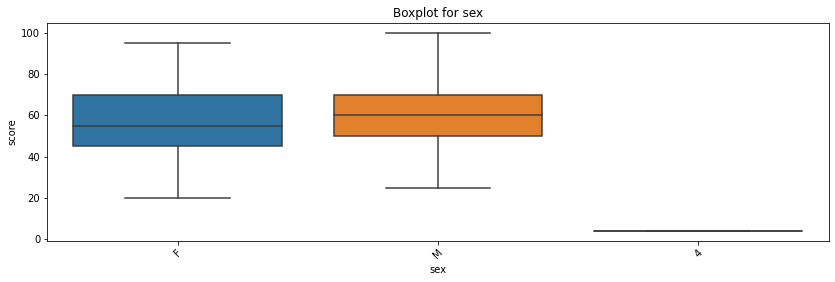

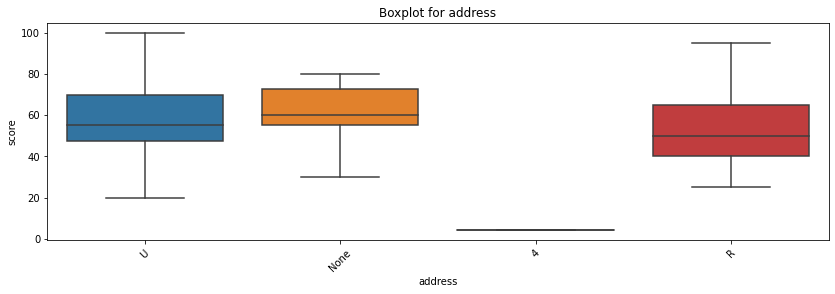

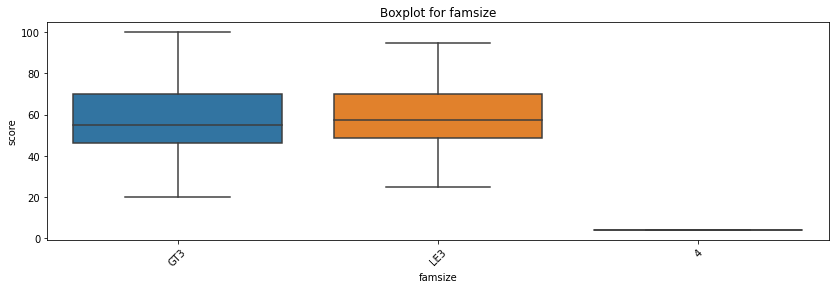

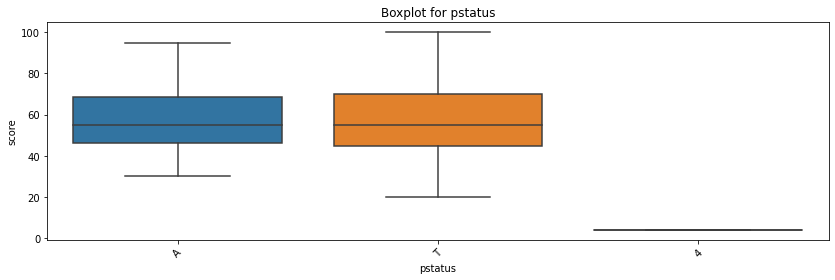

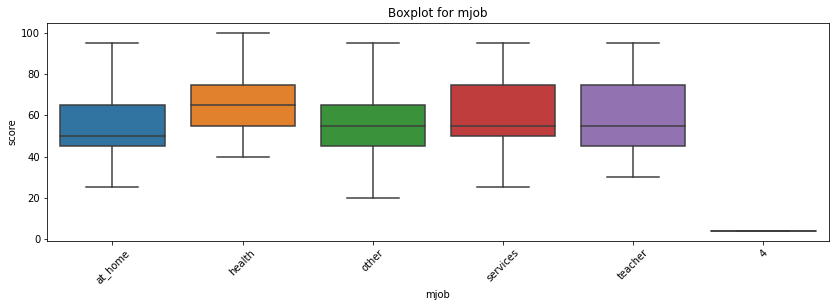

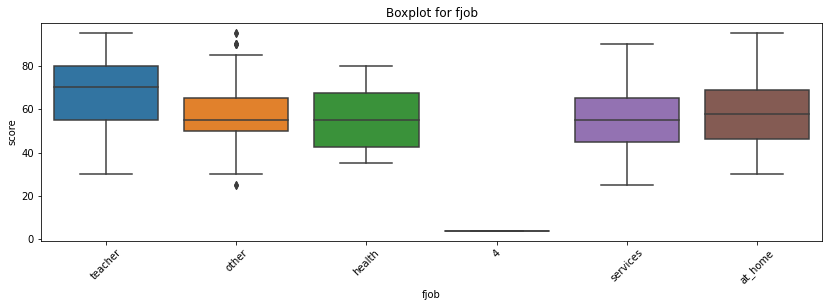

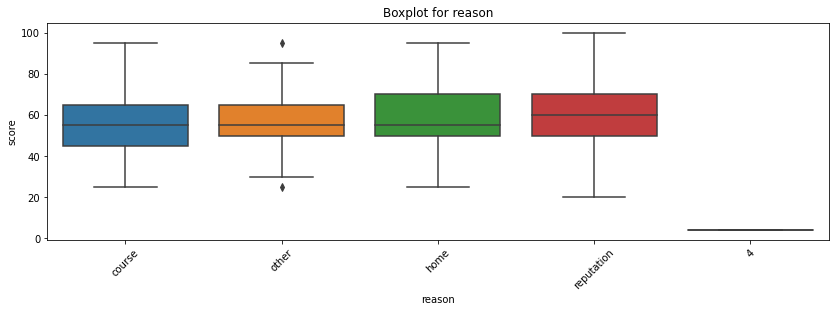

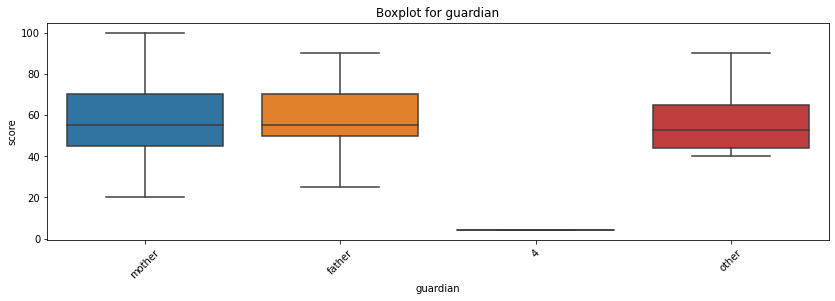

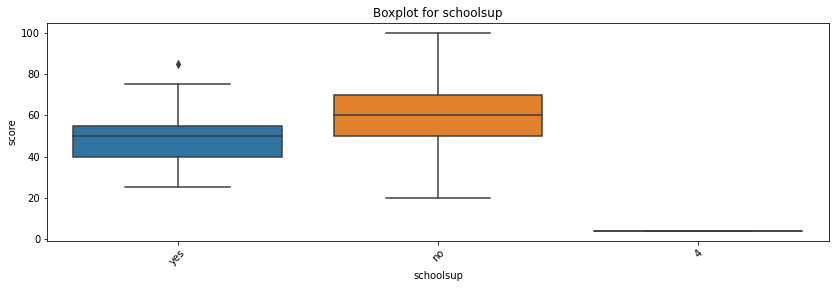

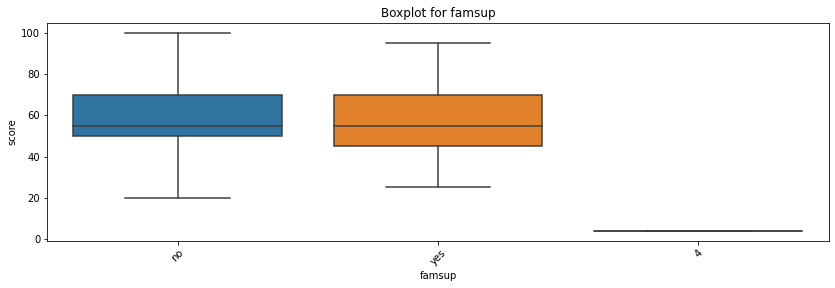

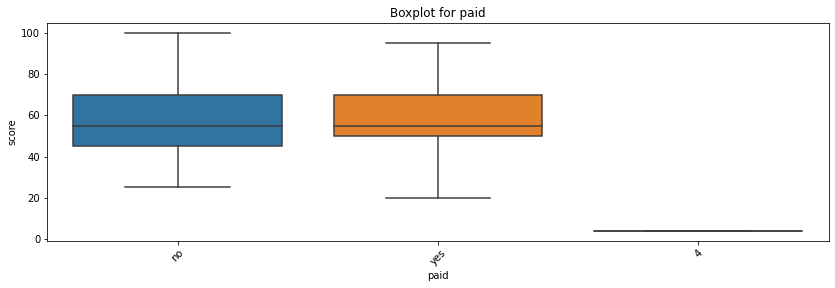

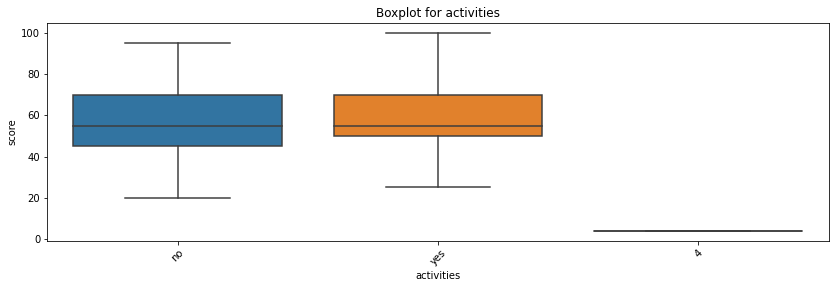

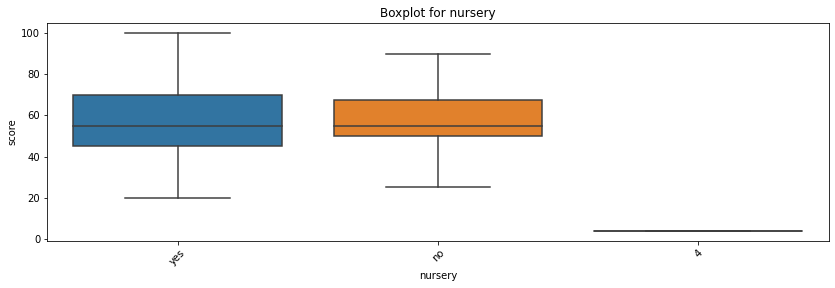

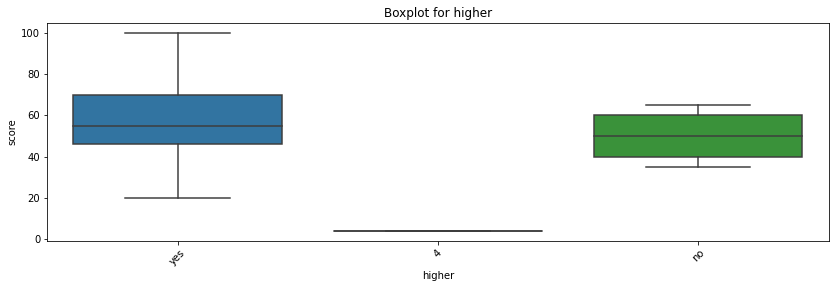

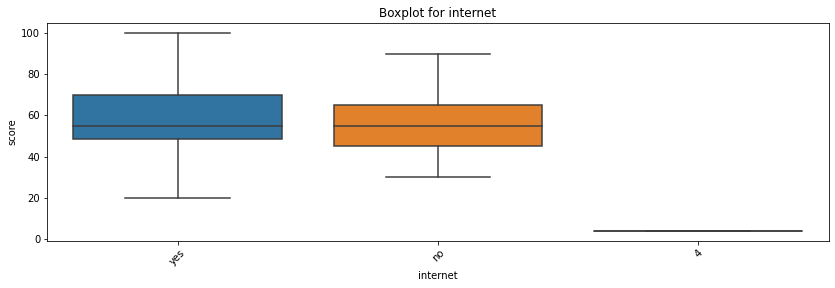

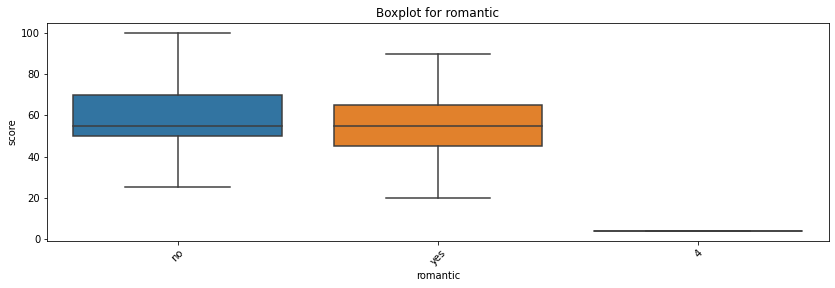

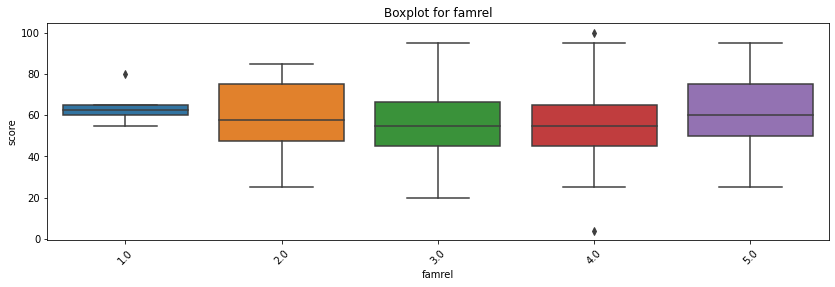

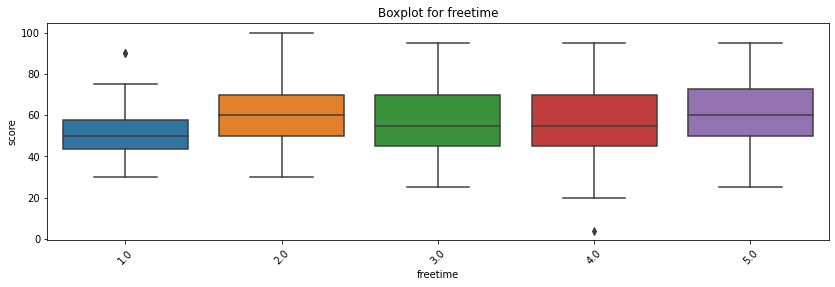

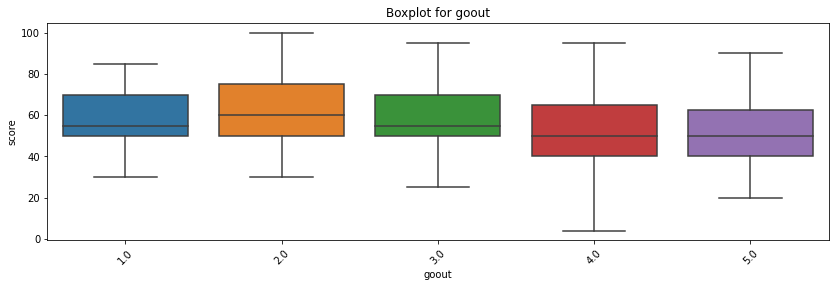

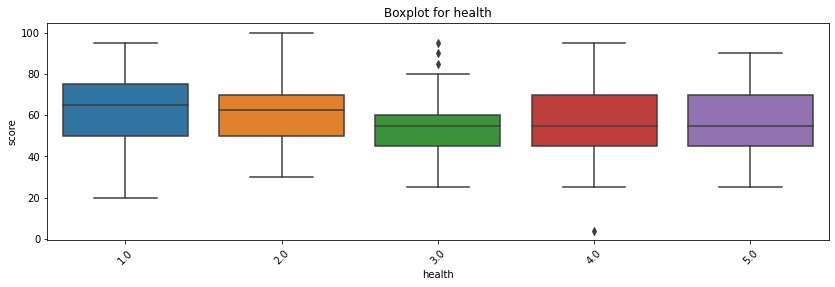

In [41]:
cat_variables = ['school', 'sex',  'address', 'famsize', 'pstatus','mjob', 'fjob',
                 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                 'nursery', 'higher', 'internet', 'romantic', 'famrel','freetime',
                 'goout', 'health']

for col in cat_variables:
    get_boxplot(col)

Возможно на успеваемость влияют следующие признаки: 'mjob', 'fjob','schoolsup', 'higher','famrel','freetime','goout', 'health'.

Наибольшее количество пропусков в столбцах, связанных с семьей, родителями ученика.
Прежде чем их заполнить, нужно понять связь параметров. Предположим, что  если 
в 'famsize' значение равно 3, то вероятно, что родители живут вместе 'T', а если меньше, чем 3 - раздельно 'A'. Если родители живут раздельно, то параметры 'medu'/'fedu', 'mjob'/'fjob' для неживущего с учеником родителя могут быть неизвестны.
Также мы не можем ничего сказать про опекуна в семьях, где значение 'famsize' меньше, чем 3.

In [43]:
# Заменим пропущенные значения в столбце 'pstatus' на ‘T’, если 'famsize == ‘GT3’.

missing_data2 = df[(df['pstatus'].isna()) & (df['famsize'].notna())].index   
df.loc[((df['pstatus'].isna()) & (df['famsize'] == 'GT3')), 'pstatus'] = 'T'

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

In [44]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [46]:
categorical_variables = ['school', 'sex',  'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason',
                         'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
                         'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'traveltime', 'studytime',
                         'failures']

numeric_variables = ['age', 'medu', 'fedu', 'absences', 'score']


for col in categorical_variables:
    get_stat_dif(col)
    

for col in numeric_variables:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки score


Колонки mjob, fjob, schoolsup, goout, studytime, failures, medu, score имеют статически значимые различия. Перенесём их в датасет для постороения модели. 

In [47]:
col_for_model = df.drop(columns=['school', 'age', 'famsize', 'pstatus', 'reason', 
                                 'guardian', 'famsup', 'paid', 'activities', 'nursery',
                                 'higher', 'internet', 'freetime','romantic'])

In [48]:
col_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         351 non-null    object 
 1   address     351 non-null    object 
 2   medu        351 non-null    object 
 3   fedu        330 non-null    float64
 4   mjob        334 non-null    object 
 5   fjob        319 non-null    object 
 6   traveltime  351 non-null    object 
 7   studytime   344 non-null    float64
 8   failures    331 non-null    float64
 9   schoolsup   342 non-null    object 
 10  famrel      327 non-null    float64
 11  goout       345 non-null    float64
 12  health      338 non-null    float64
 13  absences    338 non-null    float64
 14  score       351 non-null    float64
dtypes: float64(8), object(7)
memory usage: 43.9+ KB


Выводы:

После анализа данных из датасета были удалены строки содержащие пустые значения в таргетном столбце 'score'. 
Исправлено неверное значение в столбце с образование отца. 
Удален столбец 'studytime, granular', так как отсутствует его описание, дано неверное название, и он полностью коррелирует со столбцом 'studytime', скорее всего это ошибка.
Была удалена строка с неверным значением в столбце с семейными отношениями 'famrel'. Обнаружены явные выбросы в столбце с количеством пропущенных занятий 'absences', которые были удалены. 
Столбцы содержат небольшое число пропусков, частично заполнены пропуски в 'pstatus' и 'traveltime'.
Проведён корреляционный анализ и t-тест, определены статистически значимые различия для колонок. По результатам в статичтически значимые попал столбец 'fjob'(изначально данные про отца планировалось удаить из-за большого количества пропусков и отсутствия аргументов по их заполнению), поэтому решено было оставить и столбец 'fedu' для корректного отображения, однако, успеваемость по математике зависит в большей степени от образования и работы матери, а не отца. 
Сформирован датасет для построения модели содержащий 351 стоку и 14 столбцов.